+---+------------------+--------------+
|   |     startups     |    amount    |
+---+------------------+--------------+
| 0 |     Flipkart     | 4059700000.0 |
| 1 | Rapido Bike Taxi | 3900000000.0 |
| 2 |      Paytm       | 3148950000.0 |
| 3 |       Ola        | 984500000.0  |
| 4 |      Udaan       | 870000000.0  |
| 5 |   Flipkart.com   | 700000000.0  |
| 6 |     Snapdeal     | 700000000.0  |
| 7 |     Ola Cabs     | 669700000.0  |
| 8 |    True North    | 600000000.0  |
| 9 |    BigBasket     | 507000000.0  |
+---+------------------+--------------+


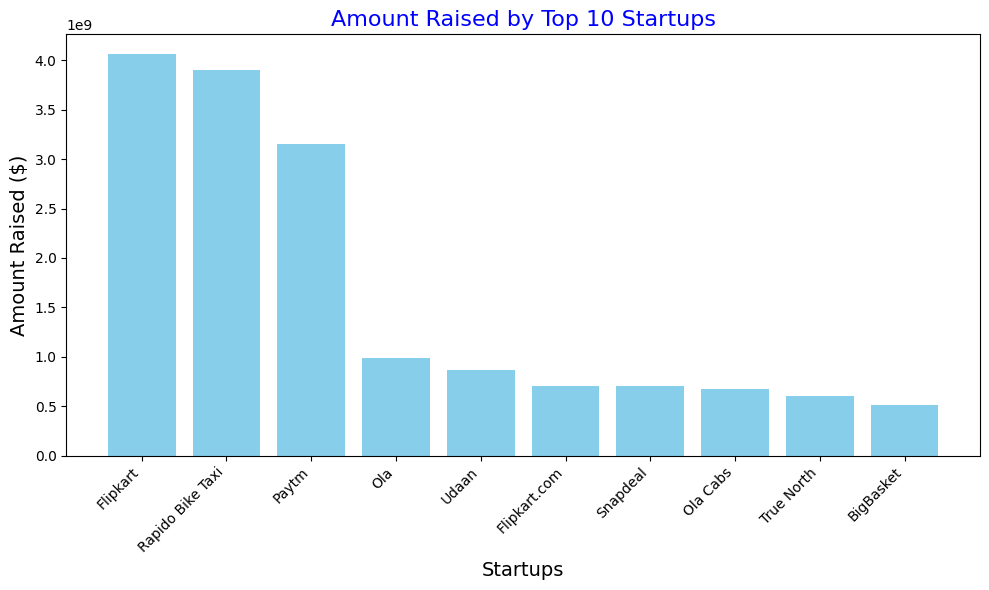

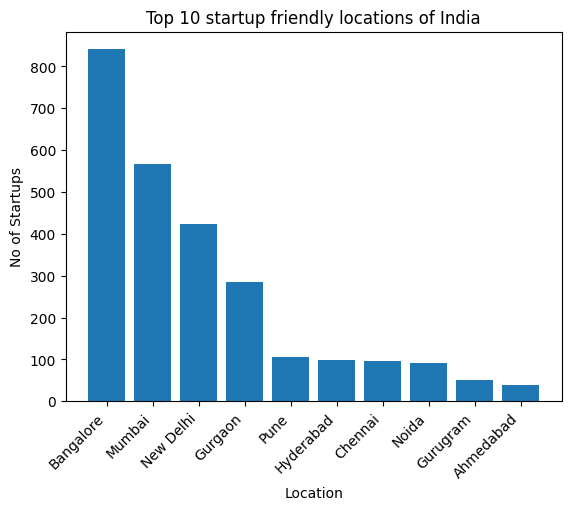

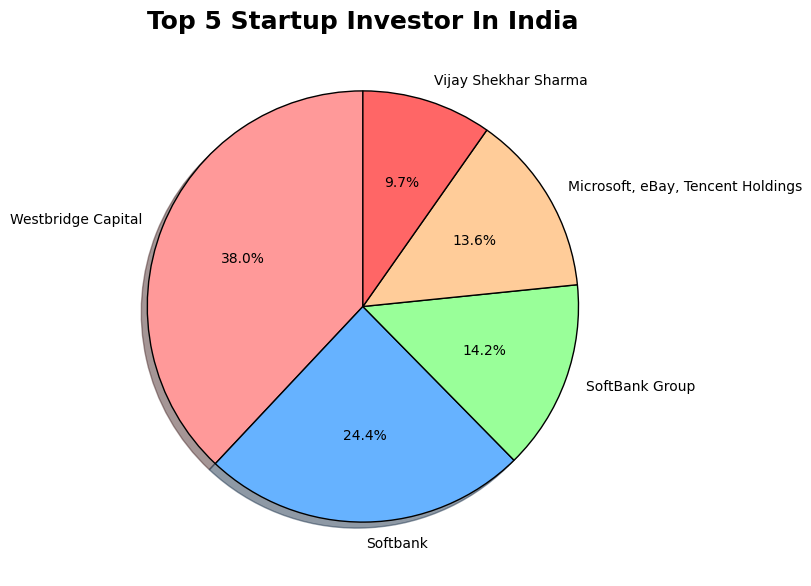

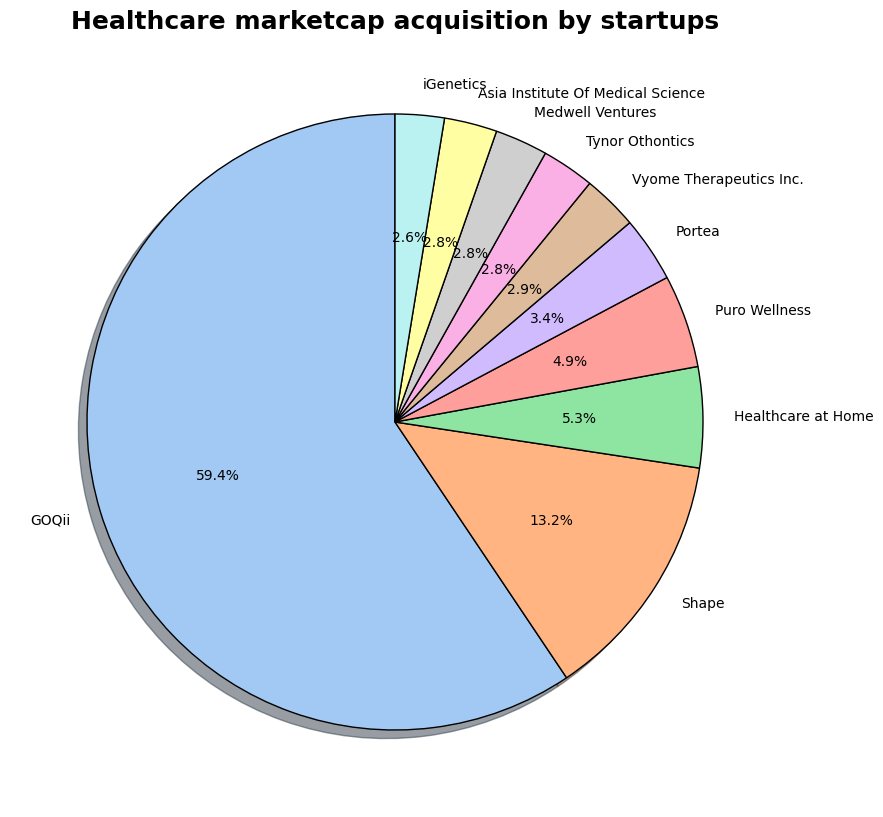

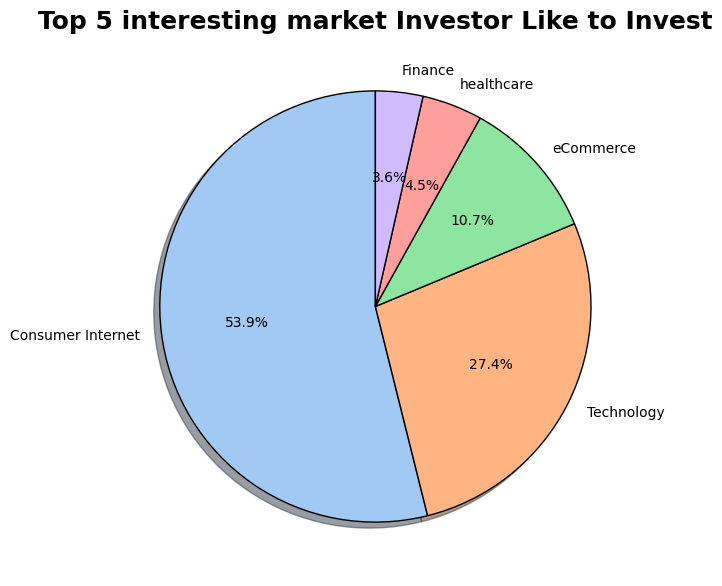

In [17]:
# Import all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

def load_data(file_path):
    #Daatafile is loaded
    df = pd.read_csv(file_path)
    return df

def rename_columns(df):
    #Rename attributes
    df.rename(columns={
        'Date dd/mm/yyyy': 'date',
        'Startup Name': 'startups',
        'Industry Vertical': 'vertical',
        'SubVertical': 'subvertical',
        'City  Location': 'location',
        'Investors Name': 'investor',
        'Amount in USD': 'amount',
        'InvestmentnType': 'investment round'
    }, inplace=True)
    return df

def clean_data(df):
    #Data cleansing
    df['amount']=df['amount'].fillna('0')
    df['amount']=df['amount'].str.replace(',','')
    df['amount']=df['amount'].str.replace('undisclosed','0')
    df['amount']=df['amount'].str.replace('unknown','0')
    df['amount']=df['amount'].str.replace('Undisclosed','0')
    df=df[df['amount'].str.isdigit()]
    df['amount']=df['amount'].astype('float64')
    df['vertical']=df['vertical'].str.replace('Health and wellness','healthcare')
    df['vertical']=df['vertical'].str.replace('Health and Wellness','healthcare')
    df['vertical']=df['vertical'].str.replace('Healthcare','healthcare')
    df['vertical']=df['vertical'].str.replace('Health Care','healthcare')
    return df

def top_10_funding(df):
    #Top 10 highest fund raising startups
    funding_overview = df.groupby('startups')['amount'].sum().sort_values(ascending=False).head(10)
    top_10_df = funding_overview.reset_index()
    print(tabulate(top_10_df, headers='keys', tablefmt='pretty'))
    return top_10_df

def plot_top_10_funding(top_10_df):
    #Amount Raised by Top 10 Startups
    #Matplot librery is used
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_df['startups'], top_10_df['amount'], color='skyblue')
    plt.title('Amount Raised by Top 10 Startups', fontsize=16, color='blue')
    plt.xlabel('Startups', fontsize=14)
    plt.ylabel('Amount Raised ($)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def clean_locations(df):
    #Data cleansing
    replacements = {
        'Bengaluru': 'Bangalore',
        'Bangalore/ Bangkok': 'Bangalore',
        'SFO / Bangalore': 'Bangalore',
        'Mumbai/Bengaluru': 'Mumbai',
        'New Delhi / US': 'New Delhi'
    }
    for old, new in replacements.items():
        df['location'] = df['location'].str.replace(old, new)
        df['vertical'] = df['vertical'].str.replace(old, new)
    return df

def plot_top_10_locations(df):
    #Top 10 startup friendly locations of India
    top_10_locations = df.groupby('location')['startups'].size().reset_index(name='num_startups').sort_values(by='num_startups', ascending=False).head(10)
    plt.bar(top_10_locations['location'], top_10_locations['num_startups'])
    plt.xlabel('Location')
    plt.ylabel('No of Startups')
    plt.title('Top 10 startup friendly locations of India')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_top_5_investors(df):
    #Top 5 investors
    top_5_investors = df.groupby('investor')['amount'].sum().reset_index().sort_values(by='amount', ascending=False).head(5)
    plt.figure(figsize=(7, 7))
    plt.pie(top_5_investors['amount'], labels=top_5_investors['investor'], autopct='%1.1f%%', startangle=90,
            colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'], shadow=True, wedgeprops={'edgecolor': 'black'})
    plt.title('Top 5 Startup Investor In India', fontsize=18, weight='bold')
    plt.show()

def plot_healthcare_marketcap(df):
    #Py chart of healthcare market
    Helthcare=df[df['vertical'] == 'healthcare'][['startups','amount']]
    Helthcare =Helthcare[Helthcare['amount'] > 0]
    Top10_Helthcare_company=Helthcare.sort_values(by='amount',ascending=False).head(10)
    plt.figure(figsize=(10,10))
    plt.pie(Top10_Helthcare_company['amount'], labels=Top10_Helthcare_company['startups'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'),shadow=True, wedgeprops={'edgecolor': 'black'})
    plt.title('Healthcare marketcap acquisition by startups', fontsize=18, weight='bold')
    plt.show()

def plot_top_5_interesting_markets(df):
    #Top 5 interesting market Investor Like to Invest
    top_markets = df.groupby('vertical')['startups'].size().reset_index(name='num_startups').sort_values(by='num_startups', ascending=False).head(5)
    plt.figure(figsize=(7, 7))
    plt.pie(top_markets['num_startups'], labels=top_markets['vertical'], autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), shadow=True, wedgeprops={'edgecolor': 'black'})
    plt.title('Top 5 interesting market Investor Like to Invest', fontsize=18, weight='bold')
    plt.show()

def main():
    file_path = '/content/startup_funding.csv'
    df = load_data(file_path)
    df = rename_columns(df)
    df = clean_data(df)
    top_10_df = top_10_funding(df)
    plot_top_10_funding(top_10_df)
    df = clean_locations(df)
    plot_top_10_locations(df)
    plot_top_5_investors(df)
    plot_healthcare_marketcap(df)
    plot_top_5_interesting_markets(df)

if __name__ == "__main__":
    main()
